In [2]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
Image(url='http://datascience.uci.edu/wp-content/uploads/sites/2/2014/09/data_science_logo_with_image1.png')

## Predictive Modeling with Python - _Linear Regression_
#### Author: Brian Vegetabile

### Goals of this Lesson
 
- Present the fundamentals of Linear Regression for Prediction
    - Notation and Framework
    - Gradient Descent for Linear Regression
        - Advantages and Issues
    - Closed form Matrix Solutions for Linear Regression
        - Advantages and Issues
- Demonstrate Python 
    - Exploratory Plotting
        - Simple plotting Pyplot from Matplotlib
    - Code Gradient Descent
        - A Crash Course in Programming in Python
            - Loops in Python
            - Numpy Arrays and Pandas DataFrames
            - Numpy Mathematics and Linear Algebra
    - Code Closed Form Matrix Solution
        - Linear Algebra in Python
    - Perform Linear Regression in scikit-learn
        - Specialized packages in python - scikit-learn


### References for Linear Regression


- Elements of Statistical Learning by Hastie, Tibshriani, Friedman - Chapter 3 
- Alex Ihler's Course Notes on Linear Models for Regression - http://sli.ics.uci.edu/Classes/2015W-273a
- scikit-learn Documentation - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
- Linear Regression Analysis By Seber and Lee - http://www.wiley.com/WileyCDA/WileyTitle/productCd-0471415405,subjectCd-ST24.html
- Applied Linear Regression by Weisberg - http://onlinelibrary.wiley.com/book/10.1002/0471704091
- Wikipedia - http://en.wikipedia.org/wiki/Linear_regression

### Linear Regression Notation and Framework

Linear Regression supervised learning technique that is interested in predicting a response or target $y$, based on a linear combination of a set $p$ predictors or features, $x= (1, x_1,\dots, x_p)$ such that,

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p = x_i^T\beta
\end{equation*}

_**Data We Observe**_

\begin{eqnarray*}
y &:& \mbox{response or target variable} \\
x &:& \mbox{set of $p$ predictor or explanatory variables } x^T = (1, x_1, \dots, x_p) 
\end{eqnarray*}

_** What We Are Trying to Learn**_

\begin{eqnarray*}
\beta^T = (\beta_0, \dots, \beta_p) : \mbox{Parameters values to for a best prediction of }y \rightarrow \hat y
\end{eqnarray*}

_**Outcomes We are Trying to Predict**_

\begin{eqnarray*}
\hat y : \mbox{Prediction for the data that we observe}
\end{eqnarray*}

_**Matrix Notation**_

\begin{equation*}
Y = \left( \begin{array}{ccc}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{array} \right)
\qquad
X = \left( \begin{array}{ccc}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,p} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{i,1} & x_{i,2} & \dots & x_{i,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N,1} & x_{N,2} & \dots & x_{N,p} \\
\end{array} \right)
\qquad
\beta = \left( \begin{array}{ccc}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_j \\
\vdots \\
\beta_p
\end{array} \right)
\end{equation*}


_Why is it called Linear Regression?_

It is often asked, why is it called linear regression if we can use polynomial terms and other transformations as the predictors.  That is 

\begin{equation*}
    y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_1^3 + \beta_4 \sin(x_1)
\end{equation*}

is still a linear regression, though it contains polynomial and trigonometric transformations of $x_1$.  This is due to the fact that term _linear_ applies to the coefficients $\beta$ and not the input features $x$.  


_** How can we Learn $\beta$? **_

Linear Regression can be thought of as an optimization problem where we want to minimize some loss function of the error between the prediction $\hat y$ and the observed data $y$.  

\begin{eqnarray*}
    error_i &=& y_i - \hat y_i \\
    &=& y_i - x_i^T\beta
\end{eqnarray*}

_Let's see what these errors look like..._

Below we show a simulation where the observed $y$ was generated such that $y= 1 + 0.5 x + \epsilon$ and $\epsilon \sim N(0,1)$.  If we assume that know the truth that $\hat y=1 + 0.5 x$, the red lines demonstrate the error (or residuals) between the observed and the truth.  

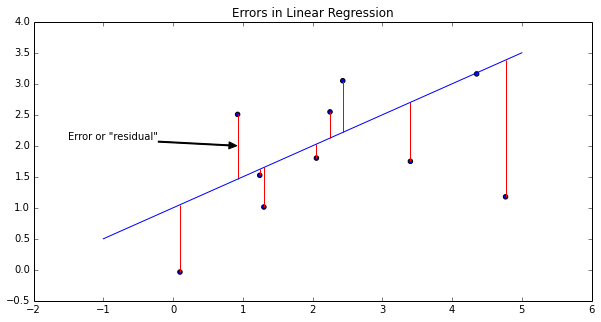

In [226]:
np.random.seed(33)     # Setting a seed allows reproducability of experiments

beta0 = 1              # Creating an intercept
beta1 = 0.5            # Creating a slope

# Randomly sampling data points
x = np.random.uniform(0,5,10)
y = beta0 + beta1 * x + np.random.normal(0,1,10)
line1 = beta0 + beta1 * np.arange(-1, 6)

f = plt.figure()
plt.scatter(x,y)                   # Plotting observed data
plt.plot(np.arange(-1,6), line1)   # Plotting the true line
for i, xi in enumerate(x):
    plt.vlines(xi, beta0 + beta1 * xi, y[i], colors='red') # Plotting Residual Lines
plt.annotate('Error or "residual"', xy = (x[5], 2), xytext = (-1.5,2.1),
             arrowprops=dict(width=1,headwidth=7,facecolor='black', shrink=0.01))
f.set_size_inches(10,5)
plt.title('Errors in Linear Regression')
plt.show()

_Choosing a Loss Function to Optimize_

Historically Linear Regression has been solved using the method of Least Squares where we are interested in minimizing the mean squared error loss function of the form:

\begin{eqnarray*}
    Loss(\beta) = MSE &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat y_i)^2 \\
    &=& \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\
\end{eqnarray*}

Where $N$ is the total number of observations.  Other loss functions can be used, but using mean squared error (also referred to sum of the squared residuals in other text) has very nice properities for closed form solutions.  We will use this loss function for both gradient descent and to create a closed form matrix solution.

### Before We Present Solutions for Linear Regression: Introducing a Baseball Dataset

We'll use this dataset to investigate Linear Regression.  The dataset consists of 337 observations and 18 variables from the set of Major League Baseball players who played at least one game in both the 1991 and 1992
seasons, excluding pitchers.  The dataset contains the 1992 salaries for that population, along with performance measures for each player from 1991.  Four categorical variables indicate how free each player was to move to other teams.

** Reference **

- Pay for Play: Are Baseball Salaries Based on Performance?
    - http://www.amstat.org/publications/jse/v6n2/datasets.watnik.html

**Filename**

- 'baseball.dat.txt'.

**Variables**

- _Salary_: Thousands of dollars
- _AVG_: Batting average
- _OBP_: On-base percentage
- _Runs_: Number of runs
- _Hits_: Number of hits
- _Doubles_: Number of doubles
- _Triples_: Number of triples
- _HR_: Number of home runs
- _RBI_: Number of runs batted in
- _Walks_: Number of walks
- _SO_: Number of strike-outs
- _SB_: Number of stolen bases
- _Errs_: Number of errors
- _free agency eligibility_: Indicator of "free agency eligibility"
- _free agent in 1991/2_: Indicator of "free agent in 1991/2"
- _arbitration eligibility_: Indicator of "arbitration eligibility"
- _arbitration in 1991/2_: Indicator of "arbitration in 1991/2"
- _Name_: Player's name (in quotation marks)

** What we will try to predict **

We will attempt to predict the players salary based upon some predictor variables such as OBP, Walks, RBIs, etc. 


#### Load The Data

Loading data in python from csv files in python can be done by a few different ways.  The numpy package has a function called 'genfromtxt' that can read csv files, while the pandas library has the 'read_csv' function.  Remember that we have imported numpy and pandas as `np` and `pd` respectively at the top of this notebook.  An example using pandas is as follows:

    pd.read_csv(filename, **args)

http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html

_**Student Action - Load the 'baseball.dat.txt' file into a variable**_

In [14]:
baseball = pd.read_csv('baseball.dat.txt', skipinitialspace=True)

_**Crash Course: Plotting with Matplotlib**_

At the top of this notebook we have imported the the package `pyplot as plt` from the `matplotlib` library.  `matplotlib` is a great package for creating simple plots in Python.  Below is a link to their tutorial for basic plotting.

_Tutorials_

- http://matplotlib.org/users/pyplot_tutorial.html
- https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html

_Simple Plotting_

- Step 1: Create a variable to store a new figure object
    - fig = plt.figure()
- Step 2: Create the plot of your choice
    - Common Plots
        - plt.plot(x,y) - A line plot
        - plt.scatter(x,y) - Scatter Plots
        - plt.hist(x) - Histogram of a variable
        - Example Plots: http://matplotlib.org/gallery.html
- Step 3: Create labels for your plot for better interpretability
    - X Label
        - plt.xlabel('String')
    - Y Label
        - plt.ylabel('String')
    - Title
        - plt.title('String')
- Step 4: Change the figure size for better viewing within the iPython Notebook
    - fig.set_size_inches(width, height)
- Step 5: Show the plot
    - plt.show()
        - The above command allows the plot to be shown below the cell that you're currently in.  This is made possible by the `magic` command `%matplotlib inline`.  
- _NOTE: This may not always be the best way to create plots, but it is a quick template to get you started._
        
_Transforming Variables_

We'll talk more about numpy later, but to perform the logarithmic transformation use the command

- `np.log(`$array$`)`

#### Data Exploration - Investigate the Variables

_**Student Action**_

Create four plots 

- A histogram of the variable $Salary$ 
- A histogram of the $log(Salary)$
- A histogram of the variable $Hits$
- a scatterplot of $log(Salary)$ vs $OBP$.

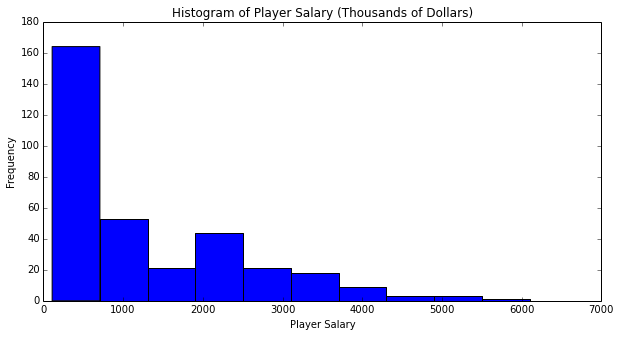

In [15]:
# Histogram of Salaries
f = plt.figure()
plt.hist(baseball['Salary'])
plt.xlabel('Player Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Player Salary (Thousands of Dollars)')
f.set_size_inches(10, 5)
plt.show()

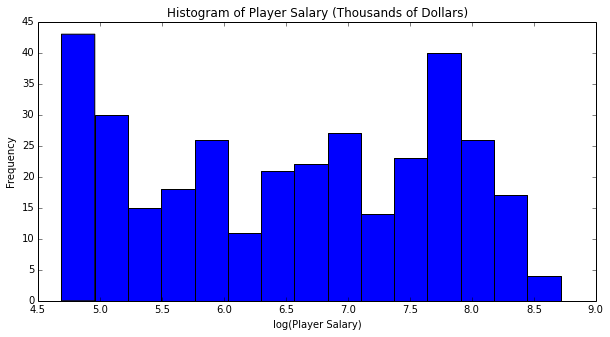

In [291]:
# Histogram of log(Salaries)
f = plt.figure()
plt.hist(np.log(baseball['Salary']), bins=15)
plt.xlabel('log(Player Salary)')
plt.ylabel('Frequency')
plt.title('Histogram of Player Salary (Thousands of Dollars)')
f.set_size_inches(10, 5)
plt.show()

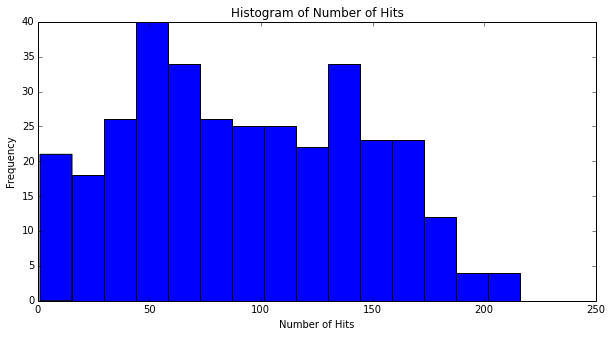

In [293]:
# Histogram of Hits
f = plt.figure()
plt.hist(baseball['Hits'], bins=15)
plt.xlabel('Number of Hits')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Hits')
f.set_size_inches(10, 5)
plt.show()

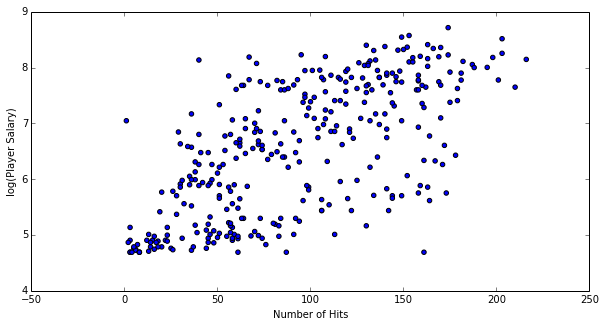

In [284]:
# Scatter Plot of Salarie vs. Hitting
f = plt.figure()
plt.scatter(baseball['Hits'], np.log(baseball['Salary']))
plt.xlabel('Number of Hits')
plt.ylabel('log(Player Salary)')
f.set_size_inches(10, 5)
plt.show()

## Gradient Descent for Linear Regression

In Linear Regression we are interested in optimizing our loss function $Loss(\beta)$ to find the optimatal $\beta$ such that 

\begin{eqnarray*}
\hat \beta &=& \arg \min_{\beta} \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i^T\beta)^2 \\
&=& \arg \min_{\beta} \frac{1}{N} (Y - X\beta)^T (Y - X\beta) \\
\end{eqnarray*}

One optimization technique called 'Gradient Descent' is useful for finding an optimal solution to this problem.  Gradient descent is a first order optimization technique that attempts to find a local minimum of a function by updating its position by taking steps proportional to the negative gradient of the function at its current point.  The gradient at the point indicates the direction of steepest ascent and is the best guess for which direction the algorithm should go.  

If we consider $\theta$ to be some parameters we are interested in optimizing, $L(\theta)$ to be our loss function, and $\alpha$ to be our step size proportionality, then we have the following algorithm:

_________

_**Algorithm - Gradient Descent**_

- Initialize $\theta$
- Until $\alpha || \nabla L(\theta) || < tol $:
    - $\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla_{\theta} L(\theta^{(t)})$
__________

For our problem at hand, we therefore need to find $\nabla L(\beta)$, thus the deriviative of $L(\beta)$ due to the $j^{th}$ feature is:

\begin{eqnarray*}
    \frac{\partial L(\beta)}{\partial \beta_j} = -\frac{2}{N}\sum_{i=1}^{N} (y_i - x_i^T\beta)\cdot{x_{i,j}}
\end{eqnarray*}

In matrix notation this can be written:

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}(Y - X\beta)^T (Y - X\beta) \\
&=& \frac{1}{N}(Y^TY - 2 \beta^T X^T Y + \beta^T X^T X\beta) \\
\nabla_{\beta} L(\beta) &=& \frac{1}{N} (-2 X^T Y + 2 X^T X \beta) \\
&=& -\frac{2}{N} X^T (Y - X \beta) \\
\end{eqnarray*}

** Comments on Gradient Descent**

- Advantage: Very General Algorithm $\rightarrow$ Gradient Descent and its variants are used throughout Machine Learning and Statistics
- Disadvantage: Highly Sensitive to Initial Starting Conditions
    - Not gauranteed to find the global optima
- Disadvantage: How do you choose step size $\alpha$?
    - Too small $\rightarrow$ May never find the minima
    - Too large $\rightarrow$ May step past the minima
    - Can we fix it?
        - Adaptive step sizes
        - Newton's Method for Optimization
            - http://en.wikipedia.org/wiki/Newton%27s_method_in_optimization
        - Each correction obviously comes with it's own computational considerations.

Before we code this, a crash course in the Python you'll need to code this...

##### Crash Course: Python Programming Needed for Gradient Descent

- Python Loops:
    - https://wiki.python.org/moin/ForLoop
    - https://wiki.python.org/moin/WhileLoop
        - Beware infinite loops in an iPython Notebook, there's a great chance you won't be able to get out of it.

                for x in range(0, 3):
                    print "We're on time %d" % (x)

                collection = ['hey', 5, 'd']
                for x in collection:
                    print x

                x = 0
                while x < 10:
                    print 'UCI Data Science'
                    x += 1

_For Loop Examples_

In [245]:
for x in range(0, 3):
    print "We're on time %d" % (x)

collection = ['hey', 5, 'd']
for x in collection:
    print x

x = 0
while x < 10:
    print 'UCI Data Science'
    x += 1

We're on time 0
We're on time 1
We're on time 2
hey
5
d
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science
UCI Data Science


- Numpy for scientific computing
    - This should be enough Numpy to code the Gradient Descent Algorithm
    - http://www.numpy.org/
    - Creating Numpy arrays and Matrices
        - Numpy has both a function for Numpy matrices `numpy.matrix()` and Numpy Arrays `numpy.array([])`.  It is generally advisable to use numpy arrays over matrices in scientific computing.  
            - A comparison between numpy.array() and numpy.matrix()
                - http://wiki.scipy.org/NumPy_for_Matlab_Users
            - Another benefit is that pandas DataFrames work well with numpy arrays.
        - http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
            - Creating an Empty Array:     
                - `np.empty(N)`
            - Creating an Array of Ones:     
                - `np.ones(N)`
            - Creating an Array of Specific Values:     
                - `np.array([3,4,5])`
            - Creating a Multidimensional Array:     
                - `np.array([[1,2,3],[4,5,6],[7,8,9]])`
    - Matrix multiplication:
        - http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
           - `np.dot(np.array([1,2,3,4]),np.array([2,3,4,5]))`
    - Operations on Arrays:
         - https://scipy-lectures.github.io/intro/numpy/operations.html
         - Taking the sum of a Vector: 
             - `np.sum(np.array([1,2,3,4]))`
         - Taking the transpose of a Array: 
             - `np.array([[1,1],[2,2]]).transpose()`
         - Size of an array: 
             - `len(np.array([1,1,2,2]))`
             - `np.size(np.array([1,1,2,2]))`
    - Linear Algebra in Numpy
        - Linear Algebra has its own sublibrary within Numpy
            - http://docs.scipy.org/doc/numpy/reference/routines.linalg.html
        - Inverting a Matrix
            - `np.linalg.inv(np.array([[1,2],[3,4]]))`
        - Taking the Norm of a Vector
            - `np.linalg.norm(np.array([1,2,3]))`

In [283]:
print np.dot(np.array([1,2,3,4]),np.array([2,3,4,5]))
print np.empty(2)
print np.array([3,4,5]).transpose()
print np.sum(np.array([1,2,4]))
print np.array([[3,4,5],[4,5,6]]).transpose()
print np.size(np.array([1,2,3]))
print np.linalg.inv(np.array([[1,2],[3,4]]))
print np.linalg.norm(np.array([1,2,3])), np.sqrt(14)

40
[ 0.  0.]
[3 4 5]
7
[[3 4]
 [4 5]
 [5 6]]
3
[[-2.   1. ]
 [ 1.5 -0.5]]
3.74165738677 3.74165738677


- Pandas DataFrames for Design Matrices
    - To create a matrix in Pandas, use the DataFrame method.
        - http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html
                - matrix = pd.DataFrame({'var1': data1,
                                         'var2': data2})
    - Accessing the columns of a Pandas DataFrame can be done using the columns method 
        - Returning the name of the $i^{th}$ column
            - `matrix.columns[i]`
        - Returning the values of the $i^{th}$ column
            - `matrix[matrix.columns[i]]`
        - Accessing by Colume name
            - `matrix['var1']`

In [286]:
x1 = np.arange(0,10)
x2 = np.arange(0,20,2)
design = pd.DataFrame({'x1':x1,
                       'x2':x2})
print design
print
print 'Column: ', design.columns[1]
print
print design['x1']

   x1  x2
0   0   0
1   1   2
2   2   4
3   3   6
4   4   8
5   5  10
6   6  12
7   7  14
8   8  16
9   9  18

Column:  x2

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: x1, dtype: int64


_** Student Action - Perform Gradient Descent on the Baseball Dataset**_

Remember, our response is $Salary$ and our predictor is $Hits$

#### Code Gradient Descent Here

- Tips for a successful convergence
    - Initialize 
        - $\alpha=0.00005$
        - Slope $ = 0.015$
        - Intercept $ = 5.13$

In [246]:
# Setting a Random Seed for Reproducibility 
np.random.seed(2015)

# Setting up our matrices 
Y = np.log(baseball['Salary'])
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'Hits' : baseball['Hits']})
p = len(X.columns)

# Initializing the beta vector 0.01513353  5.13051682
betas = np.array([0.015,5.13])

# Initializing Alpha
alph = 0.00005

# Setting a tolerance 
tol = 1e-8

err = Y - np.dot(X, betas)
grad = -2*np.dot(X.transpose(),err)/N
niter = 1.
while (alph*np.linalg.norm(grad) > tol) & (niter < 20000):
    err = Y - np.dot(X, betas)
    grad = -2*np.dot(X.transpose(),err)/N
    betas = betas - alph*grad
    niter += 1

print niter, betas

8546.0 [ 0.01513698  5.13009587]


## Linear Regression Matrix Solution

From the last section, you may have recognized that we could actually solve for $\beta$ directly.  

\begin{eqnarray*}
Loss(\beta) &=& \frac{1}{N}(Y - X\beta)^T (Y - X\beta) \\
\nabla_{\beta} L(\beta) &=& \frac{1}{N} (-2 X^T Y + 2 X^T X \beta) \\
\end{eqnarray*}

Setting to zero

\begin{eqnarray*}
-2 X^T Y + 2 X^T X \beta &=& 0 \\
X^T X \beta  &=& X^T Y \\
\end{eqnarray*}

If we assume that the columns $X$ are linearly independent then

\begin{eqnarray*}
 \hat \beta  &=& (X^T X)^{-1}X^T Y \\
\end{eqnarray*}

This is called the _Ordinary Least Squares_ (OLS) Estimator 

** Comments on solving this directly **

- Advantage: Simple solution to code 
- Disadvantage: The Design Matrix must be Full Rank to invert
    - Can be corrected with a Generalized Inverse Solution
- Disadvantage: Inverting a Matrix can be a Computational Expensive operation
    - If we have a design matrix that has $n$ observations and $p$ predictors, then X is $(n\times p)$ it follows then that
    
    \begin{eqnarray*}
        X^TX \mbox{ is of size } (p \times n) \times (n \times p) = (p \times p) \\
    \end{eqnarray*}
    
    - If a matrix is of size $(N\times N)$, the computational cost of inverting it is $O(N^3)$.  
    - Thus inverting a matrix is directly related to the number of predictors that are included in the analysis.  


_** Student Action - Solve for $\hat \beta$ using  on the Baseball Dataset** _
    
- Review the above _Crash Course in Python_ for help with Linear Algebra

In [52]:
# Setting up our matrices 
Y = np.log(baseball['Salary'])
N = len(Y)
X = pd.DataFrame({'ones' : np.ones(N), 
                  'Hits' : baseball['Hits']})
def linearRegression(X, Y):
    XtX = np.dot(X.transpose(), X)
    invXtX = np.linalg.inv(XtX)
    XtY = np.dot(X.transpose(), Y)
    return np.dot(invXtX, XtY)

print linearRegression(X,Y)

[ 0.01513353  5.13051682]


## Sci-Kit Learn Linear Regression

As we've shown in the previous two exercises that when coding these algorithms ourselves, we must consider many things such as selecting step sizes, considering the computational cost of inverting matrices.  Luckily for many applications, packages have been created that have taken into consideration many of these parameter selections.  We now turn our attention to the Python package for Machine Learning called 'Sciki-Learn'.  

- http://scikit-learn.org/stable/

Included is the documentation for the scikit-learn implementation of Ordinary Least Squares from their linear models package

- _Generalized Linear Models Documentation:_ 
    - http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

- _LinearRegression Class Documentation:_  
    - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

From this we that we'll need to import the module `linear_model` using the following:

    from sklearn import linear_model
    
Let's examine an example using the `LinearRegression` class from scikit-learn.  We'll continue with the simulated data from the beginning of the exercise.

### _Example using the variables from the Residual Example_

** Notes ** 

- Calling `linear_model.LinearRegression()` creates an object of class  `sklearn.linear_model.base.LinearRegression`
    - Defaults 
        - `fit_intercept = True`: automatically adds a column vector of ones for an intercept
        - `normalize = False`: defaults to not normalizing the input predictors
        - `copy_X = False`: defaults to not copying X
        - `n_jobs = 1`: The number of jobs to use for the computation. If -1 all CPUs are used. This will only provide speedup for n_targets > 1 and sufficient large problems.
    - Example
        - `lmr = linear_model.LinearRegression()
- To fit a model, the method `.fit(X,y)` can be used
    - X must be a column vector for scikit-learn
        - This can be accomplished by creating a DataFrame using `pd.DataFrame()`
    - Example
        - lmr.fit(X,y)
- To predict out of sample values, the method `.predict(X)` can be used
- To see the $\beta$ estimates use `.coef_` for the coefficients for the predictors and `.intercept` for $\beta_0$

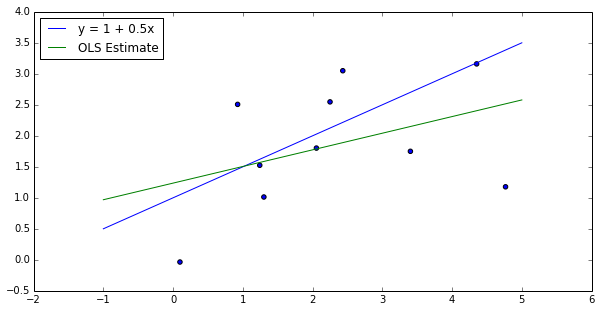

In [53]:
from sklearn import linear_model

lmr = linear_model.LinearRegression()
lmr.fit(pd.DataFrame(x), pd.DataFrame(y))

xTest = pd.DataFrame(np.arange(-1,6))
yHat = lmr.predict(xTest)

f = plt.figure()
plt.scatter(x, y)
p1, = plt.plot(np.arange(-1,6), line1)
p2, = plt.plot(xTest, yHat)
plt.legend([p1, p2], ['y = 1 + 0.5x', 'OLS Estimate'], loc=2)
f.set_size_inches(10,5)
plt.show()

### _**Final Student Task_

Finish programming Linear Regression with Gradient Descent, the direct minimization of Linear Regression, and finally the scikit-learn method.  Plot all results on one plot.  

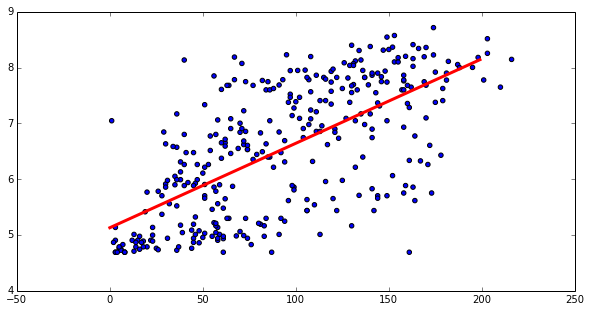

In [294]:
lmr2 = linear_model.LinearRegression(fit_intercept=True)
lmr2.fit(pd.DataFrame(baseball['Hits']),Y)
xtest = np.arange(0,200)
ytest = lmr2.intercept_ + lmr2.coef_*xtest

f = plt.figure()
plt.scatter(baseball['Hits'], np.log(baseball['Salary']))
plt.plot(xtest, ytest, color='r', linewidth=3)
f.set_size_inches(10,5)
plt.show()

### Extending Linear Regression